## simple regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df=pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [5]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
df.shape

(23, 2)

In [7]:
df.columns

Index(['Weight', 'Height'], dtype='object')

Text(0, 0.5, 'height')

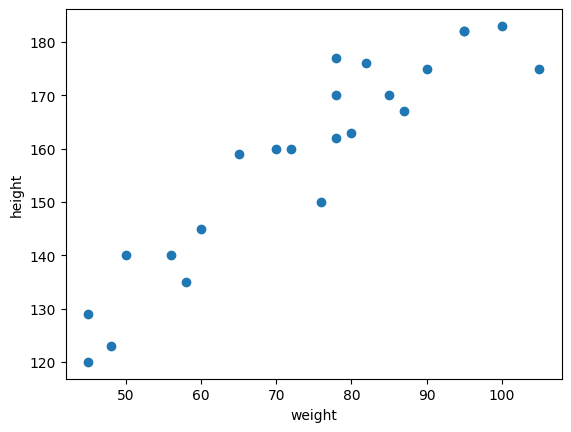

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


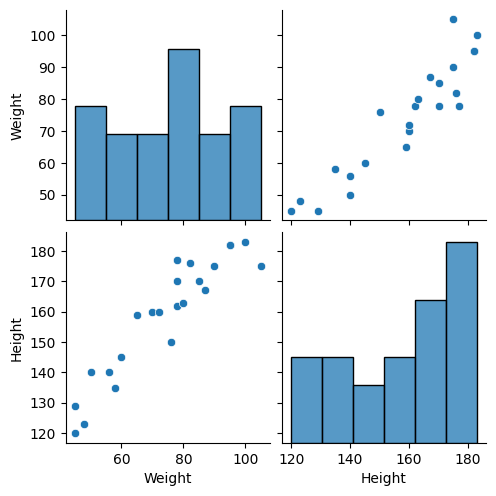

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
x=df[['Weight']]
y=df['Height']

In [12]:
x.shape

(23, 1)

In [13]:
y.shape

(23,)

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
x_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [21]:
x_train.shape

(17, 1)

In [23]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [24]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [25]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [28]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
print("coffeicent is ",reg.coef_)

coffeicent is  [17.2982057]


In [34]:
print('interscept',reg.intercept_)

interscept 156.47058823529412


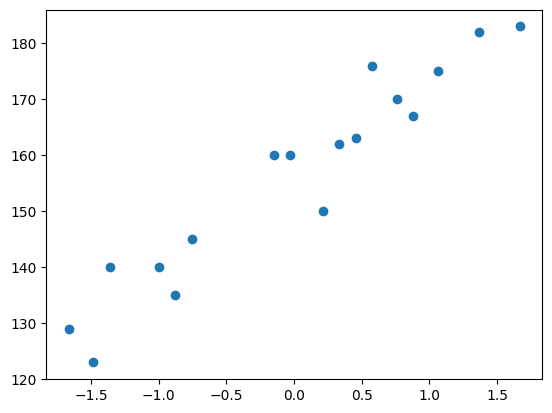

In [35]:
plt.scatter(x_train,y_train)

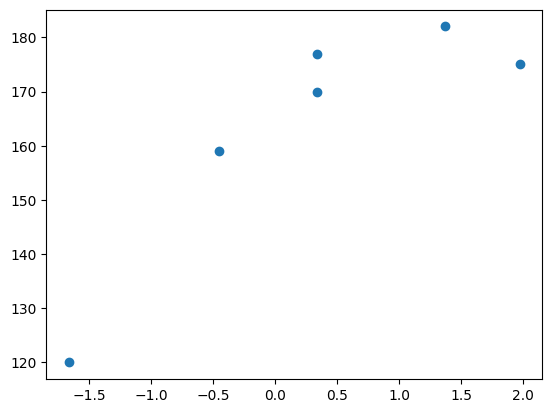

In [36]:
plt.scatter(x_test,y_test)

In [37]:
print(reg.predict(x_train))

[141.30649667 185.31934779 162.26499721 130.82724641 180.07972266
 127.68347133 143.40234673 153.88159699 160.16914715 132.92309646
 139.21064662 155.97744705 174.84009753 166.45669731 169.60047239
 171.69632245 164.36084726]


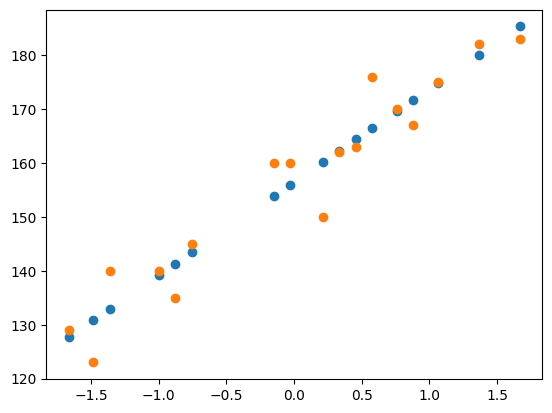

In [39]:
plt.scatter(x_train,reg.predict(x_train))
plt.scatter(x_train,y_train)

In [40]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [70]:
print(reg.predict(x_test))
print(reg.predict(x_train))

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]
[141.30649667 185.31934779 162.26499721 130.82724641 180.07972266
 127.68347133 143.40234673 153.88159699 160.16914715 132.92309646
 139.21064662 155.97744705 174.84009753 166.45669731 169.60047239
 171.69632245 164.36084726]


In [42]:
pred=reg.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [43]:
mse=mean_squared_error(y_test,pred)

In [44]:
mae=mean_absolute_error(y_test,pred)

In [45]:
import math

rmes=math.sqrt(mse)

In [46]:
print(mse)
print(mae)
print(rmes)

114.84069295228699
9.66512588679501
10.716374991212605


In [47]:
from sklearn.metrics import r2_score

In [48]:
score=r2_score(y_test,pred)

In [49]:
score

0.7360826717981276

In [55]:
!pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 882.6 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/9.8 MB 882.6 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/9.8 MB 780.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 774.0 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 774.0 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.8 MB 808.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.6/9.8 MB 806.6 kB/s eta 0:00:11
   ------- -------------------------------- 1.8/9.8 MB 818.3 kB/s eta 0:00:10
   ------- -----------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import statsmodels.api as sm

In [64]:
model=sm.OLS(y_train,x_train).fit()

In [65]:
pred=model.predict(x_train)

In [66]:
pred

array([-15.16409156,  28.84875956,   5.79440897, -25.64334183,
        23.60913442, -28.78711691, -13.06824151,  -2.58899124,
         3.69855892, -23.54749178, -17.25994162,  -0.49314119,
        18.36950929,   9.98610908,  13.12988416,  15.22573421,
         7.89025902])

In [67]:
pred1=model.predict(x_test)

In [68]:
pred1

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                       0.664
Time:                        11:01:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\dell\Documents\code\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [71]:
reg.predict(scaler.transform([[45]]))

c:\Users\dell\Documents\code\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([127.68347133])